# PROBLEM 2

Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment . Consider following example for better understanding Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events. In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”. Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing how drop-off rate is, dropoff rate is defined as number of patients dropping off each month. Then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”.

In [1]:
# Importing LIbraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# reading train data

df_train = pd.read_parquet(r"E:\downloads\assignment\Structured_Data_Assignment\train.parquet")

In [3]:

# taking users who are all taking target drug

target_data = df_train[df_train['Incident'] == 'TARGET DRUG']

In [5]:

# Calculate dropoff rate by month

target_data = target_data.copy()
target_data['Date'] = pd.to_datetime(target_data['Date'])
target_data['Month'] = target_data['Date'].dt.month
dropoff_rates = target_data.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

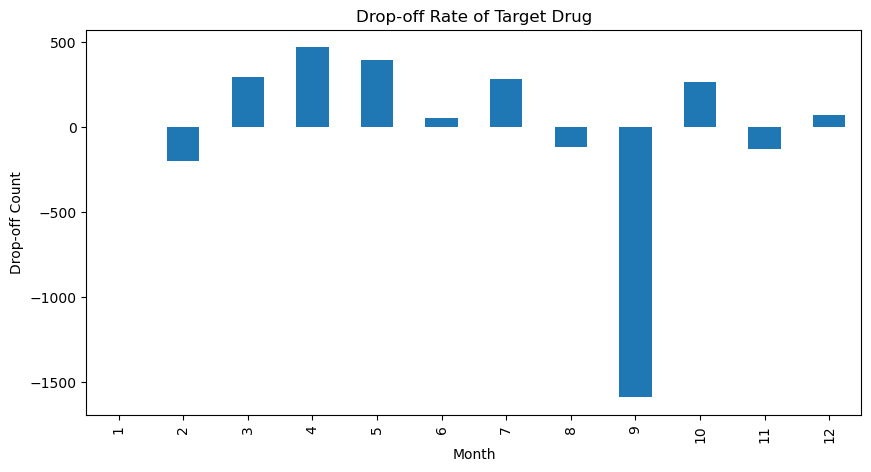

In [8]:

# to visualize the drop off rate over time

plt.figure(figsize = (10, 5))
dropoff_rates.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-off Rate of Target Drug')
plt.show()

In [9]:

# to analyze events driving dropp-off

dropoff_reasons = df_train[df_train['Patient-Uid'].isin(target_data['Patient-Uid'])]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Date'] < dropoff_reasons.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_reasons = dropoff_reasons[dropoff_reasons['Incident'] != 'TARGET DRUG']

In [10]:

# to calculate the frequency of each event leading to drop-off

event_freq = dropoff_reasons['Incident'].value_counts()

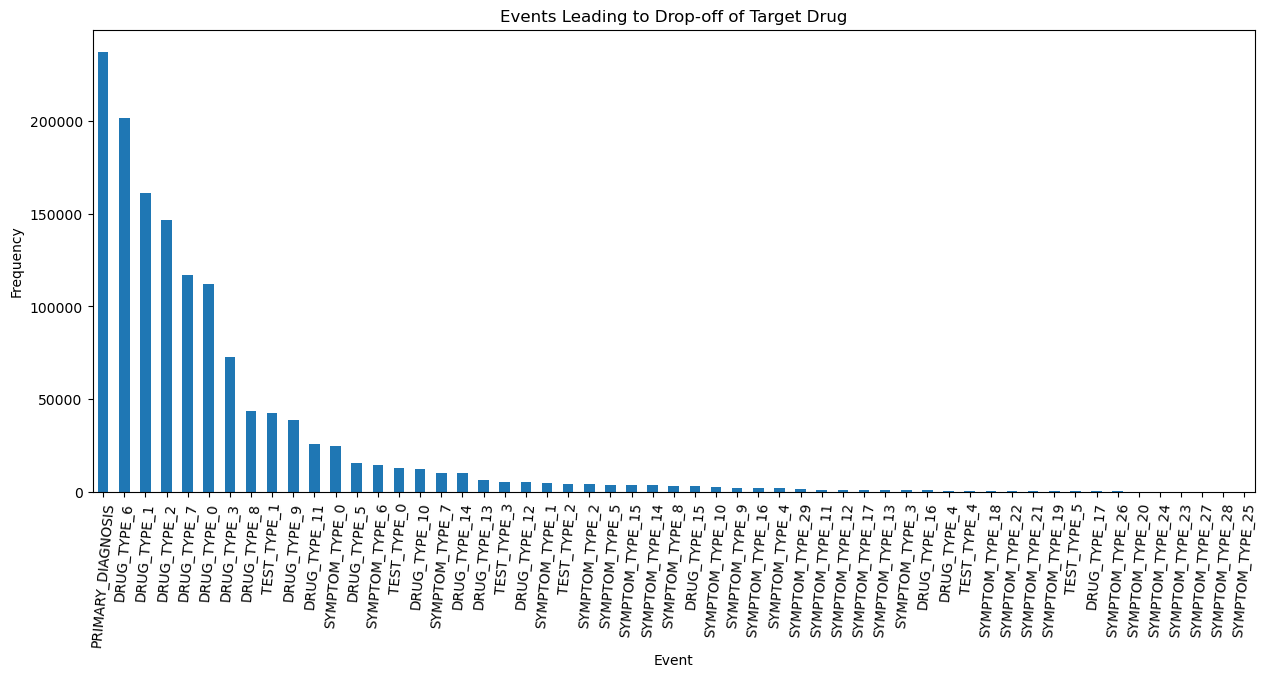

In [14]:

# Plot the events leading to drop-off

plt.figure(figsize=(15, 6))
event_freq.plot(kind='bar')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.xticks(rotation=85)
plt.title('Events Leading to Drop-off of Target Drug')
plt.show()

# Insights

From the above visualization Patients dropped-off is high in the month of
 - APRIL
 - MAY 
 - JULY and OCTOBER
 
And from the above plotting what events are driving a patient to stop taking “Target Drug” is
 - PRIMARY_DIAGNOSIS
 - DRUG_TYPE_6
 - DRUG_TYPE_1

These Incidents are the top 3 events to stop taking the "TARGET DRUG"
